ANALYSIS NOTEBOOK  - DONNELLY 2019 PLOS ONE

Patrick M. Donnelly  

University of Washington

JULY 7, 2020

In [12]:
# import necessary databases and libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [21]:
# plot inline figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
plt.rcParams['pdf.fonttype'] = 42
from numpy.polynomial.polynomial import polyfit

In [29]:
# pull data from data folder in repository
data = pd.read_csv('data/data.csv')

In [30]:
# separate data into figure-specific dataframes
passage_data = data[['record_id','pigs_casecontrol', 'int_session','study_name', 'first_acc', 'second_rate']]
passage_diff_data = data[['pigs_casecontrol', 'study_name', 'first_acc_diff', 'second_rate_diff']]
wordlist_data = data[['record_id','pigs_casecontrol', 'int_session','study_name','word_time', 'word_acc', 'word_rate',
                           'pseudo_time', 'pseudo_acc', 'pseudo_rate']]
wordlist_acc_data = data[['record_id', 'int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc']]
wordlist_acc_diff_data = data[['pigs_casecontrol', 'word_acc_diff', 'pseudo_acc_diff']]
wordlist_rate_data = data[['pigs_casecontrol', 'study_name', 'word_rate','pseudo_rate']]
matlab_data = data[['record_id', 'visit_age','int_session', 'pigs_casecontrol', 
                               'study_name','pigs_word1_acc', 'pigs_word2_acc', 
                               'pigs_pseudo1_acc', 'pigs_pseudo2_acc','word_acc', 'pseudo_acc', 'first_acc', 'second_rate', 'wj_brs', 'twre_index',
                         'ctopp_rapid', 'ctopp_pa', 'wasi_fs2', 'pigs_practice_numstories']]
first_accuracy = data[['pigs_casecontrol', 'study_name','short_first_acc',
                          'long_first_acc', 'first_acc_diff']]
second_rate = data[['pigs_casecontrol', 'study_name', 'short_second_rate', 'long_second_rate', 'second_rate_diff']]
predictor_data = data[['pigs_casecontrol', 'study_name','visit_age', 'word_acc_diff', 'pseudo_acc_diff', 
                            'first_acc_diff', 'second_rate_diff', 'ctopp_pa', 'ctopp_pm','ctopp_rapid', 'wasi_fs2']]



In [31]:
#create new variable for plotting longitudinal line plots on violin plots
word = wordlist_data.drop_duplicates().reset_index()
word['violin_axis'] = np.nan

for record in range(0, len(word.record_id)):
    if word.pigs_casecontrol[record] == 0:
        if word.int_session[record] == 1:
            word.loc[record, 'violin_axis'] = -0.10
        elif word.int_session[record] == 2:
            word.loc[record, 'violin_axis'] = 0.10
    elif word.pigs_casecontrol[record] == 1:
        if word.int_session[record] == 1:
            word.loc[record, 'violin_axis'] = 0.90          
        elif word.int_session[record] == 2:
            word.loc[record, 'violin_axis'] = 1.10
            

passage = passage_data.drop_duplicates().reset_index()
passage['violin_axis'] = np.nan

for record in range(0, len(word.record_id)):
    if passage.pigs_casecontrol[record] == 0:
        if passage.int_session[record] == 1:
            passage.loc[record, 'violin_axis'] = -0.10
        elif passage.int_session[record] == 2:
            passage.loc[record, 'violin_axis'] = 0.10
    elif passage.pigs_casecontrol[record] == 1:
        if passage.int_session[record] == 1:
            passage.loc[record, 'violin_axis'] = 0.90          
        elif passage.int_session[record] == 2:
            passage.loc[record, 'violin_axis'] = 1.10

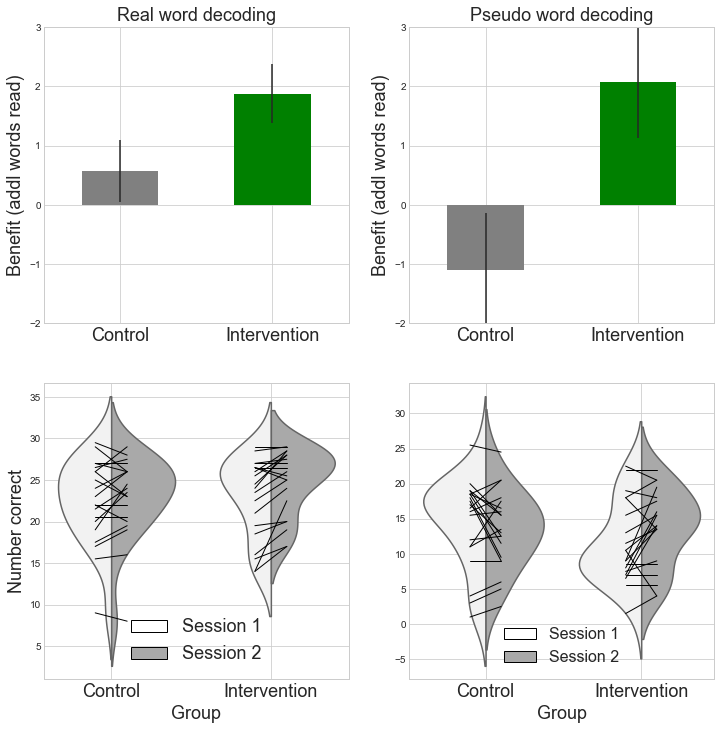

In [32]:
#Plot figure 2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,12))


wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['word_acc_diff'].sem()
fig1 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, 
                                      legend=False, 
                                      rot=0, color=['grey', 'green'], ax=ax1)
ax1.set_title("Real word decoding", fontsize=18)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Benefit (addl words read)', fontsize=18)
ax1.set_xticklabels(['Control', 'Intervention'], fontsize=18), 
ax1.set_ylim([-2,3])


wordlist_acc_diff_grouped = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].mean()
wl_acc_diff_grpd_error = wordlist_acc_diff_data.groupby(['pigs_casecontrol'])['pseudo_acc_diff'].sem()
fig2 = wordlist_acc_diff_grouped.plot(kind='bar', yerr=wl_acc_diff_grpd_error, 
                                      legend=False, color=['grey', 'green'], rot=0, ax=ax2)
ax2.set_title("Pseudo word decoding", fontsize=18)
ax2.set_xlabel('', fontsize=16)
ax2.set_ylabel('Benefit (addl words read)', fontsize=18)
ax2.set_xticklabels(['Control', 'Intervention'], fontsize=18)
ax2.set_ylim([-2,3])





g = sns.violinplot(x="pigs_casecontrol", y="word_acc",hue='int_session',
               data = word, split=True, inner=None, color='darkgrey', ax=ax3)

for record in range(0, len(word.record_id.unique())):
    data = word[word.record_id == word.record_id.unique()[record]]
    data.groupby(['violin_axis'])['word_acc'].mean().plot(kind='line', colormap='copper',linewidth=1,ax=ax3)
    

white_patch = mpatches.Patch(facecolor='white', label='Session 1', edgecolor="black")
gray_patch = mpatches.Patch(facecolor='darkgrey', label='Session 2', edgecolor="black")



ax3.set_title("", fontsize=18)
ax3.set_xlabel("Group", fontsize=18)
ax3.set_ylabel("Number correct", fontsize=18)
ax3.set_xticklabels(["Control", "Intervention"], fontsize=18)
ax3.legend(handles=[white_patch, gray_patch], loc='lower center', fontsize=18)



g = sns.violinplot(x="pigs_casecontrol", y="pseudo_acc",hue='int_session',
               data = word, split=True, inner=None, color='darkgrey', ax=ax4)

for record in range(0, len(word.record_id.unique())):
    data = word[word.record_id == word.record_id.unique()[record]]
    data.groupby(['violin_axis'])['pseudo_acc'].mean().plot(kind='line', colormap='copper',linewidth=1,ax=ax4)
    

white_patch = mpatches.Patch(facecolor='white', label='Session 1', edgecolor="black")
gray_patch = mpatches.Patch(facecolor='darkgrey', label='Session 2', edgecolor="black")



ax4.set_title("", fontsize=18)
ax4.set_xlabel("Group", fontsize=18)
ax4.set_ylabel("")
ax4.set_xticklabels(["Control", "Intervention"], fontsize=18)
ax4.legend(handles=[white_patch, gray_patch], loc='lower center', fontsize=16)


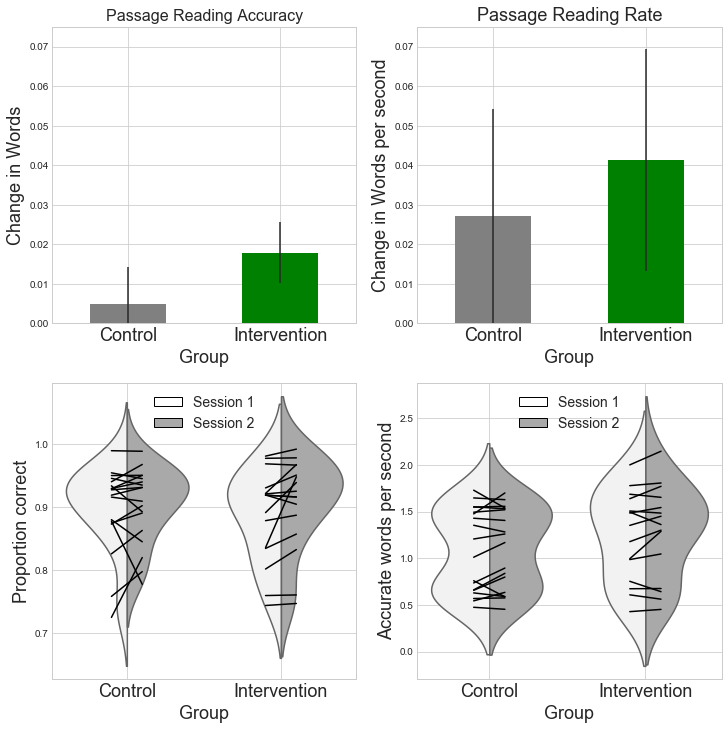

In [35]:
# plot figure 3
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,12))

acc_grouped = passage_diff_data.groupby(['pigs_casecontrol'])[ 'first_acc_diff'].mean()
acc_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])[ 'first_acc_diff'].sem()
acc_grouped.plot(kind='bar',color=['grey', 'green'],
                             yerr=acc_grouped_error, rot=0, ax=ax1)
ax1.set_title('Passage Reading Accuracy', fontsize=16)
ax1.set_xlabel('Group', fontsize=18)
ax1.set_ylabel('Change in Words', fontsize=18)
ax1.set_xticklabels(['Control', 'Intervention'], fontsize=18)
ax1.set_ylim([0,0.075])

rate_grouped = passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].mean()
rate_grouped_error = passage_diff_data.groupby(['pigs_casecontrol'])['second_rate_diff'].sem()
rate_grouped.plot(kind='bar', yerr=rate_grouped_error,
                  rot=0, color=['grey', 'green'], ax=ax2)
ax2.set_title('Passage Reading Rate', fontsize=18)
ax2.set_xlabel('Group', fontsize=18)
ax2.set_ylabel('Change in Words per second', fontsize=18)
ax2.set_xticklabels(['Control', 'Intervention'], fontsize=18)
ax2.set_ylim([0,0.075])





g = sns.violinplot(x="pigs_casecontrol", y='first_acc',hue='int_session',
               data = passage, split=True, inner=None, color='darkgrey', ax=ax3)

for record in range(0, len(passage.record_id.unique())):
    data = passage[passage.record_id == passage.record_id.unique()[record]]
    data.groupby(['violin_axis'])['first_acc'].mean().plot(kind='line', colormap='copper',ax=ax3)
    

white_patch = mpatches.Patch(facecolor='white', label='Session 1', edgecolor="black")
gray_patch = mpatches.Patch(facecolor='darkgrey', label='Session 2', edgecolor="black")



ax3.set_title("", fontsize=18)
ax3.set_xlabel("Group", fontsize=18)
ax3.set_ylabel("Proportion correct", fontsize=18)
ax3.set_xticklabels(["Control", "Intervention"], fontsize=18)
ax3.legend(handles=[white_patch, gray_patch], loc='upper center', fontsize=14)



g = sns.violinplot(x="pigs_casecontrol", y='second_rate',hue='int_session',
               data = passage, split=True, inner=None, color='darkgrey', ax=ax4)

for record in range(0, len(passage.record_id.unique())):
    data = passage[passage.record_id == passage.record_id.unique()[record]]
    data.groupby(['violin_axis'])['second_rate'].mean().plot(kind='line', colormap='copper',ax=ax4)
    

white_patch = mpatches.Patch(facecolor='white', label='Session 1', edgecolor="black")
gray_patch = mpatches.Patch(facecolor='darkgrey', label='Session 2', edgecolor="black")



ax4.set_title("", fontsize=18)
ax4.set_xlabel("Group", fontsize=18)
ax4.set_ylabel("Accurate words per second", fontsize=18)
ax4.set_xticklabels(["Control", "Intervention"], fontsize=18)
ax4.legend(handles=[white_patch, gray_patch], loc='upper center', fontsize=14)
